### Clustering using  K-Means in SkLearn

In [264]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns,numpy as np,pickle

%matplotlib inline
plt.style.use("seaborn")

import warnings
warnings.filterwarnings('ignore')


In [265]:
df = pd.read_csv("income.csv")
df.sample(10).T

,1,16,11,15,12,17,4,14,6,7
Name,Michael,Dipika,Tom,Ranbir,Arnold,Priyanka,Kory,Stark,David,Andrea
Age,29,40,26,32,27,41,42,29,41,38
Income($),90000,65000,45000,53000,48000,63000,150000,49500,160000,162000


In [282]:
df.describe()

,Age,Income($),Cluster
count,22.000000,22.000000,22.000000
mean,0.518717,0.388306,1.863636
std,0.347121,0.371846,0.833550
min,0.000000,0.000000,1.000000
25%,0.176471,0.115385,1.000000
50%,0.617647,0.192308,2.000000
75%,0.808824,0.771368,2.750000
max,1.000000,1.000000,3.000000


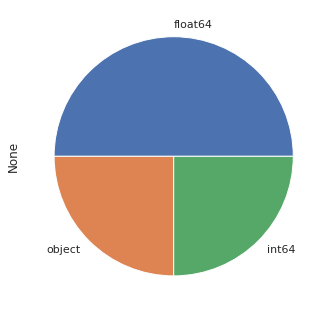

In [284]:
df.dtypes.value_counts().plot.pie()

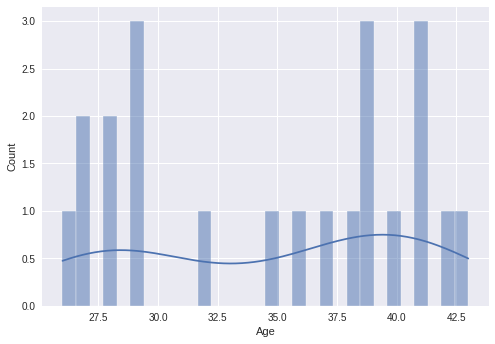

In [266]:
sns.histplot(x = "Age", data = df, bins = 30,kde = True)

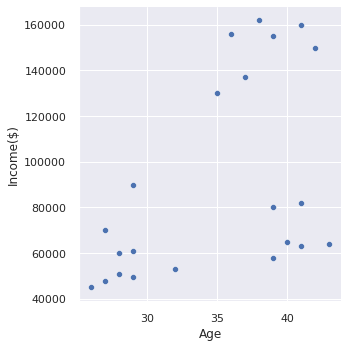

In [267]:
sns.set_theme(style="darkgrid")
sns.relplot(x="Age", y="Income($)", data = df)

### PreProcessing

In [268]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

### K-Means Model

In [269]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, random_state = 0)

def make_prediction(model,df,f1,f2) : 
  return model.fit_predict(df[[f1,f2]])
prediction = make_prediction(model,df,"Age","Income($)")

In [270]:
df["Cluster"] = prediction
df.sample(11).T

,19,2,7,20,10,9,21,4,13,8,16
Name,Alia,Mohan,Andrea,Sid,Donald,Angelina,Abdul,Kory,Jared,Brad,Dipika
Age,0.764706,0.176471,0.705882,0.882353,0.647059,0.529412,0.764706,0.941176,0.117647,0.588235,0.823529
Income($),0.299145,0.136752,1.0,0.316239,0.786325,0.726496,0.111111,0.897436,0.051282,0.948718,0.17094
Cluster,2,0,1,2,1,1,2,1,0,1,2


In [271]:
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [272]:
#err calculation
model.inertia_

0.4750783498553096

In [273]:
model.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [274]:
df["Cluster"].replace([0,1,2],[1,2,3], inplace = True)

In [275]:
np.transpose(df.sample(10))

,3,1,9,5,14,20,16,19,17,2
Name,Ismail,Michael,Angelina,Gautam,Stark,Sid,Dipika,Alia,Priyanka,Mohan
Age,0.117647,0.176471,0.529412,0.764706,0.176471,0.882353,0.823529,0.764706,0.882353,0.176471
Income($),0.128205,0.384615,0.726496,0.940171,0.038462,0.316239,0.17094,0.299145,0.153846,0.136752
Cluster,1,1,2,2,1,3,3,3,3,1


In [276]:
s = pickle.dumps(model)
final_model = pickle.loads(s)

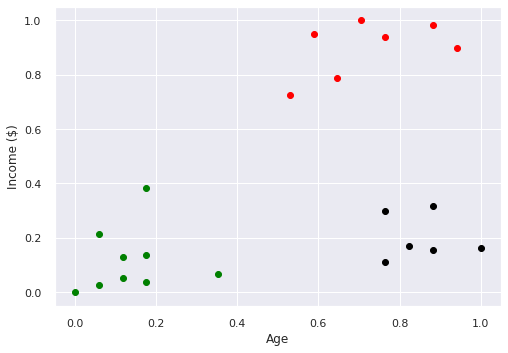

In [277]:
df1 = df[df["Cluster"] == 1]
df2 = df[df["Cluster"] == 2]
df3 = df[df["Cluster"] == 3]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')


plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [281]:
new_data = np.array([
    [43,1454.65],[38,180000],[25,30988],[36,164500],[40,16000],[32,65800],
    [40,200000], [24,61000],[46,160000],[35,180000],[27.5,80000],[42.5,160000]
    ,[27.6,70000], [29,90000],[40.5, 10000],[20,40000]
], dtype = np.float64)

index = 0

for val in new_data : 
  index += 1
  print(index, final_model.predict([val]), end = " , ")
 
print()


1 [1] , 2 [1] , 3 [1] , 4 [1] , 5 [1] , 6 [1] , 7 [1] , 8 [1] , 9 [1] , 10 [1] , 11 [1] , 12 [1] , 13 [1] , 14 [1] , 15 [1] , 16 [1] , 
